#실험 시작전에 환경 일치 시킴

In [3]:
# 책에서 나온 시스템 환경 일치
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os

# 추후 동일한 결과를 위한 그래프 특성 일치
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 1. 데이터 불러오기 

In [4]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()
    
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
    

In [5]:
housing_181136 = load_housing_data()
housing_181136.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 2. 데이터 분포확인 

## matplot histogram 사용하여 분포 확인

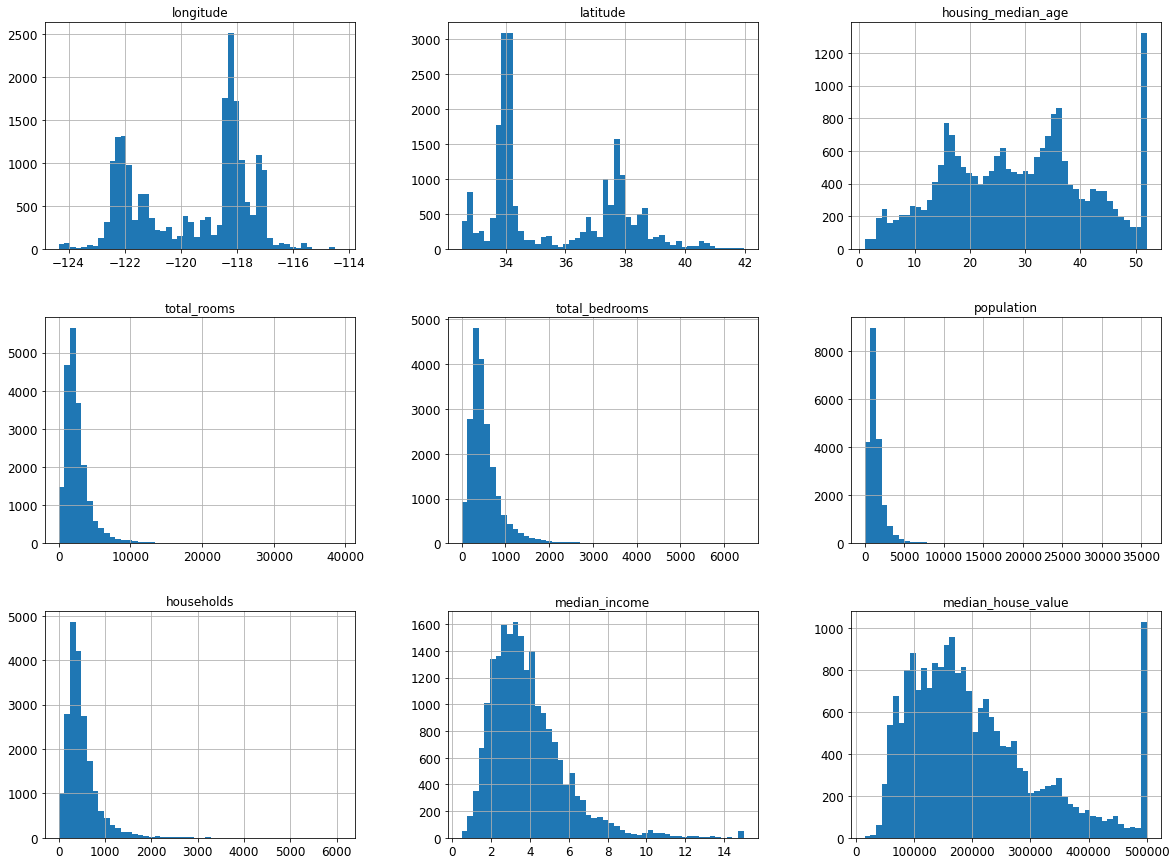

In [6]:
housing_181136.hist(bins=50, figsize=(20,15))
plt.show()

# 중간소득이 1.5~6 사이에 모여있음
# house holds는 왼쪽으로 치우쳐져 있음
# housing median age 는 50이상의 변수에 크게 나타나 있어 확인이 필요해보임
# 위도과 경도의 해석은 뒤로 미룸
# 집 가격그래프를 봤을 때, 50만이상의 수치에 데이터가 몰려있는 것을 확인
# median 수입은 왼쪽으로 치우침 1~5 사이에 모여있음
# 인구,침실, 방의 수는 같은 형태의 그래프의 모습을 띄고 있는 것으로 보여서 상관관계가 있을 것 같음

그림 저장: bad_visualization_plot


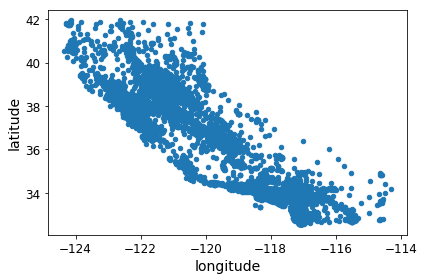

In [37]:
# 지리정보 산점도로 시각화

housing_181136.plot(kind="scatter", x="longitude", y="latitude")
save_fig("bad_visualization_plot")

그림 저장: housing_prices_scatterplot


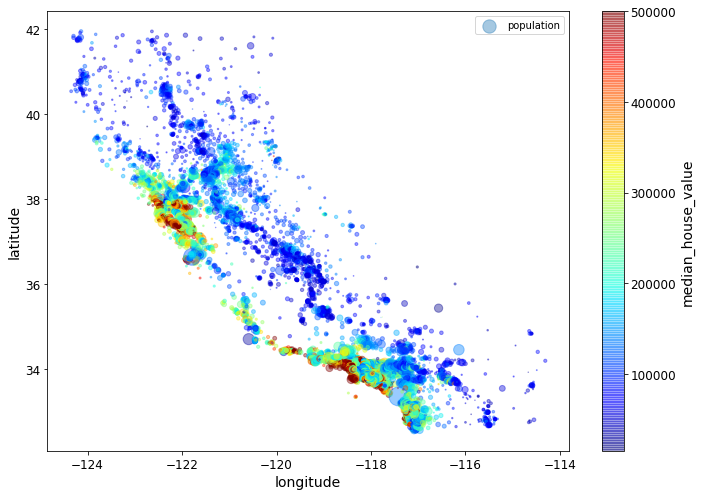

In [7]:
# 주택 가격을 변수 컬러맵 변수를 추가함 그래프 그림
housing_181136.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing_181136["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

# 해안가 쪽에 붉은색, 즉 집값이 높게 형성되어 있고
# 북쪽에는 이나 내륙쪽으로 갈수록 낮게 형성되어 있음

# 3. 상관관계 조사

In [8]:
corr_matrix = housing_181136.corr()
corr_matrix

# 집 나이 변수와 다른변수들 대부분 음의 상관관계를 띔
# 전체 방수와 침실 수는 매우 높은 상관관계를 보임
# 침실 수 변수는 인구, households와 높은 상관관계를 보임
# 수입이 많을 수록 집값이 비싼 것을 알수 있음

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


# 교재에 나온 3개의 변수 생성

In [9]:
housing_181136["rooms_per_household"] = housing_181136["total_rooms"]/housing_181136["households"]
housing_181136["bedrooms_per_room"] = housing_181136["total_bedrooms"]/housing_181136["total_rooms"]
housing_181136["population_per_household"]=housing_181136["population"]/housing_181136["households"]

In [10]:
# 다시 집 가격과의 상관관계 확인

corr_matrix = housing_181136.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

# 기존의 변수들 보다 상관관계가 더 강해짐을 알 수 있음
# rooms_per_household         0.151948
# bedrooms_per_room          -0.255880
# 하지만 population_per_household   -0.023737은 비교적 영향이 적어 보임

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

# 모델링을 위한 훈련,테스트 데이터 분할 (test_size=0.2)

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_181136, test_size=0.2, random_state=42)

housing_181136 = train_set.drop("median_house_value", axis=1) # 훈련 세트를 위해 레이블 삭제
housing_labels = train_set["median_house_value"].copy()
# 데이터 복사 

# 결측치를 중앙값으로 바꾸는 imputer 사용

In [45]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# SimpleImputer 사용해서 결측치  median 으로 채우기

housing_num = housing_181136.drop("ocean_proximity", axis=1)
#SimpleImputer 를 사용하기 위해서 문자형 변수 제거

imputer.fit(housing_num)
X = imputer.transform(housing_num)
# SimpleImputer로 결측치 제거

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)


In [15]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,6.268421,0.180940,2.300000
...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,6.129032,0.151128,3.032258
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,6.868597,0.184825,3.904232
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,3.986717,0.270823,3.332068
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,6.395349,0.166993,3.178891


# 원핫 인코딩 및 데이터 전처리 파이프 라인 구축

In [20]:
from sklearn.preprocessing import OneHotEncoder
#원핫 인코딩
from sklearn.pipeline import Pipeline
#파이프 라인
from sklearn.preprocessing import StandardScaler
# 표준 스케일러
from sklearn.base import BaseEstimator, TransformerMixin

col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing_181136.columns.get_loc(c) for c in col_names]
# 스케일링을 위한 변수의 열에 이름 대입

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        # 변수사용을 위해 선언문 작성
        
    def fit(self, X, y=None):
        return self
        # fit 함수 설정
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        # 변수들을 추가하기 위해 데이터 추가 열 설정
        # 이 함수를 사용하면 뒤에서 일일이 만든 변수 식 필요 없음
        # 어차피 갱신되어도 똑같은 값을 가짐으로 함수 재사용
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_181136.to_numpy())
# 변수 추가


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
#수치형 변수 전처리하는 파이프라인 완성


from sklearn.compose import ColumnTransformer

# 수치형 열이름 리스트
num_attribs = list(housing_num)

# 범주형 열이름 리스트
cat_attribs = ["ocean_proximity"]

# 각 열에 적용을 위해서 ColumnTransformer 객체 리스트
# 이름, 변환기, 변환기 적용될 열 이름(인덱스)
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),])


# 데이터 전체를 전처리하는 파이프 라인 완성
housing_prepared = full_pipeline.fit_transform(housing_181136)

In [21]:
housing_prepared

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])

In [23]:
housing_prepared.shape
#최종 모형 : 추가된 변수 3개 넣어서 같이 학습 실시

(16512, 19)

# 모델 선택과 훈련

# 선형회귀모델

In [24]:
#제일 기본적인 선형 모델을 사용한 학습

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [25]:
# 데이터 형태를 확인하기 위해 위 5개 데이터 슬라이싱하여 전처리후 예측 실시

some_data = housing_181136.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측:", lin_reg.predict(some_data_prepared))

예측: [181746.54359616 290558.74973505 244957.50017771 146498.51061398
 163230.42393939]


In [26]:
# 모델 평가를 위해 mse 라이브러리 사용
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
# mse(정답, 예측값)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

67593.20745775253

# 결정트리 모형

In [27]:
# 전처리할 필요가 없는 모형이지만 그래도 그냥 사용
# 다른 파라미터 설정하지 않고 seed만 부여(책애서 나온 수치랑 동일하게 적용)
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [31]:
# 위와 같이 mse로 모형 평가함
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

# 오차가 0
# 훈련데이터에 과적합된 것임을 알 수 있음(일반화가 불가능함)
# 사용하기에는 문제가 있음 
# 추가적인 제약이 필요해 보임

0.0

# 교차검증 실시

In [35]:
# cross검증 실시 하여 모델을 평가하고자함
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
# scoring="neg_mean_squared_error" 이기 때문에 나중에 스코어는 '-'를 붙여줘야할 필요가 있음

## 트리 모형 교차검증

In [34]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준 편차:", scores.std())

display_scores(tree_rmse_scores)## 트리 모형 교차검증

점수: [64137.48111905 70663.08854341 67588.79530062 71366.50269221
 73553.31858691 66383.3042299  66451.74604955 68432.53150586
 67426.08688969 70721.43239359]
평균: 68672.42873107981
표준 편차: 2697.4935637335593


## 선형 모형 교차검증

In [36]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [65000.67382615 70960.56056304 67122.63935124 66089.63153865
 68402.54686442 65266.34735288 65218.78174481 68525.46981754
 72739.87555996 68957.34111906]
평균: 67828.38677377408
표준 편차: 2468.0913950652266


## 랜덤포레스트 모형 교차검증

In [53]:
# 앙상블 모델로 가장 효과적인 모델인 랜덤포레스트 사용

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [54]:
# 위 모델에 비해 성능이 매우 좋음
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18556.526608410604

In [40]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [47335.28931346 51569.8851063  49438.1992468  51704.35254622
 52935.71039308 47105.49450597 47430.58558131 50843.63553939
 49166.63639194 50182.86396016]
평균: 49771.265258463354
표준 편차: 1931.335476676597


## 서포트벡터머신 모형 교차검증

In [42]:
# 서포트벡터머신을 사용하고자 함
# 커널을 linear로 설정하여 선형모델로 예측 실시
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

# 하지만 mse가 높은 것으로 보아 랜덤포레스트를 사용하는게 적합해 보임

110295.65344002146

In [43]:
svm_scores = cross_val_score(svm_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

점수: [111504.43912109 114071.97795269 111832.92691763 107194.10530437
 111027.66566945 112102.44337092 108437.72223692 109550.21043162
 111710.50292295 112756.0939486 ]
평균: 111018.80878762426
표준 편차: 1958.0233811438222


### 모델 결과

In [46]:
print("선형회귀:", lin_rmse_scores.mean())
print("결정트리:", tree_rmse_scores.mean())
print("랜덤포레스트:", forest_rmse_scores.mean())
print("SVM:", svm_rmse_scores.mean())

#랜덤 포레스트 모형이 가장 성능이 높은 결과를 가짐
#따라서 최종 모형은 램덤포레스트로 실시

선형회귀: 67828.38677377408
결정트리: 68672.42873107981
랜덤포레스트: 49771.265258463354
SVM: 111018.80878762426


## 그리드 서치 적용

In [47]:
# 랜덤 포레스트를 사용하기 위해서 하이퍼 파라미터 튜닝이 필요해 보임
# 모든 지점을 탐색하는 그리드 서치 사용
# 총 18개의 파라미터를 통한 성능 비교

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [48]:
grid_search.best_params_
# 성능이 가장 좋은 조합

{'max_features': 8, 'n_estimators': 30}

In [49]:
grid_search.best_estimator_
# 가장 좋은 추정치 보기

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [50]:
score=grid_search.cv_results_["mean_test_score"]
print(np.sqrt(-score))
#성능 확인

[66705.0245732  56996.50958594 54291.64467595 61245.47251755
 53486.59147095 51494.84572904 60837.07366988 53696.75252833
 51330.60889382 60211.32932541 53054.71705907 50965.43962817
 64352.62559346 56004.61911168 60905.91687901 52660.20105553
 59864.8138089  52804.67686198]


## 랜덤 서치 적용

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000205D1D6C700>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000205D1D6CC40>},
                   random_state=42, scoring='neg_mean_squared_error')

In [55]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50014.31306293897 {'max_features': 7, 'n_estimators': 180}
52663.779713038915 {'max_features': 5, 'n_estimators': 15}
51831.01311526269 {'max_features': 3, 'n_estimators': 72}
52093.02999173425 {'max_features': 5, 'n_estimators': 21}
50114.417777748225 {'max_features': 7, 'n_estimators': 122}
51758.86003586359 {'max_features': 3, 'n_estimators': 75}
51619.8835022609 {'max_features': 3, 'n_estimators': 88}
50636.12297099368 {'max_features': 5, 'n_estimators': 100}
51411.510900875044 {'max_features': 3, 'n_estimators': 150}
65665.75264815385 {'max_features': 5, 'n_estimators': 2}


### 테스트 세트로 성능 평가하기

In [57]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

# 훈련세트가 아니므로 fit_transform 이 아니라 transform 사용
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

# 훈련세트에 비해 매우 좋은 수치

50440.8400310824

In [67]:
print(final_predictions[:5])
print(y_test[:5])

[ 55163.33333333  91673.33333333 431167.         259460.
 236750.03333333]
20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
Name: median_house_value, dtype: float64
